In [2]:
!unzip '/Users/manaswini/Desktop/Neuro Nexus/TITANIC SURVIVAL PREDICTION/titanic data set.zip'

Archive:  /Users/manaswini/Desktop/Neuro Nexus/TITANIC SURVIVAL PREDICTION/titanic data set.zip
replace tested.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data=pd.read_csv('/Users/manaswini/Desktop/Neuro Nexus/TITANIC SURVIVAL PREDICTION/tested.csv')

PREPROCESSING

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
data.shape

(418, 12)

In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handle the missing values

In [9]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [10]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mode()[0])

In [12]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Remove Cabin ,Ticket and Name columns

In [13]:
data.drop('Cabin', axis=1, inplace=True)

In [14]:
data.drop('Ticket', axis=1, inplace=True)

In [15]:
data.drop('Name', axis=1, inplace=True)

In [16]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Label Encoding (Categorical values to numerical values)


In [17]:
data['Sex'] =  data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies( data, columns=['Embarked'], drop_first=True)

In [18]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,0,3,0,34.5,0,0,7.8292,True,False
1,893,1,3,1,47.0,1,0,7.0000,False,True
2,894,0,2,0,62.0,0,0,9.6875,True,False
3,895,0,3,0,27.0,0,0,8.6625,False,True
4,896,1,3,1,22.0,1,1,12.2875,False,True
5,897,0,3,0,14.0,0,0,9.2250,False,True
6,898,1,3,1,30.0,0,0,7.6292,True,False
7,899,0,2,0,26.0,1,1,29.0000,False,True
8,900,1,3,1,18.0,0,0,7.2292,False,False
9,901,0,3,0,21.0,2,0,24.1500,False,True


Visualize the data


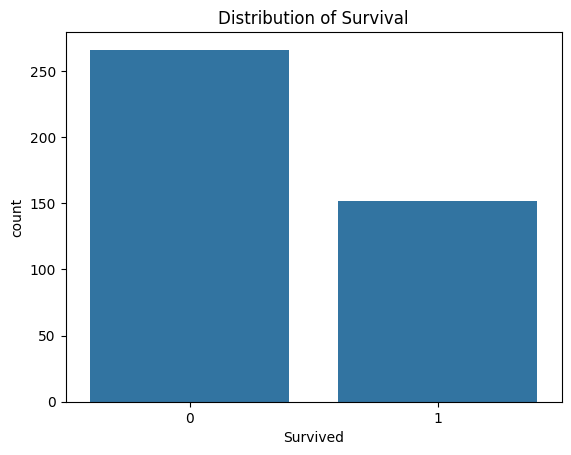

In [19]:
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.show()


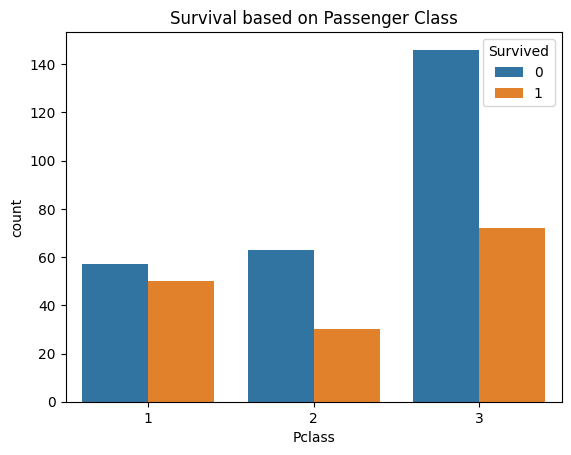

In [20]:
sns.countplot(x='Pclass', hue='Survived', data= data)
plt.title('Survival based on Passenger Class')
plt.show()


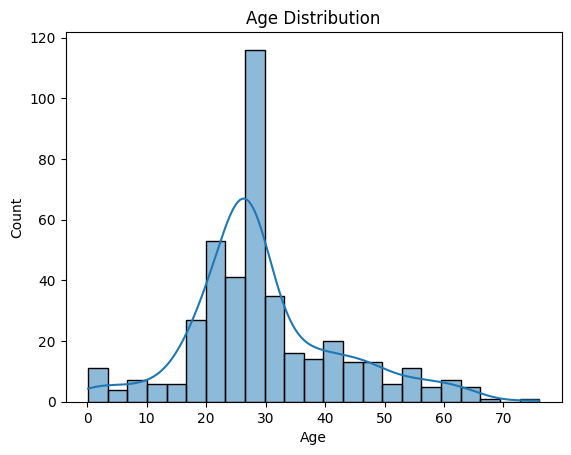

In [21]:
sns.histplot( data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()


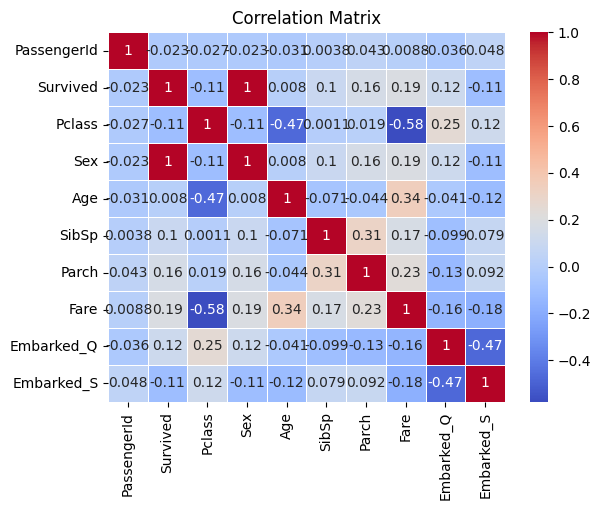

In [22]:
correlation_matrix =  data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

TWO MODELS ARE USED FOR PREDICTION AND COMPARATIVE ANALYSIS
They are:-
> Logistic Regression

> Random Forest


In [23]:
# Split the data into features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [27]:
y_pred_logreg = logreg_model.predict(X_test)

In [28]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred_rf = rf_model.predict(X_test)

In [30]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg)*100)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf)*100)

Logistic Regression Accuracy: 100.0
Random Forest Accuracy: 100.0


In [31]:
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [32]:
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression Confusion Matrix:
 [[85  0]
 [ 0 41]]
Random Forest Confusion Matrix:
 [[85  0]
 [ 0 41]]
